In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.feature_selection import SelectFromModel, SelectKBest, f_classif,mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score,balanced_accuracy_score,recall_score
import time
df=pd.read_csv('imputed_data.csv')
df.head()

,Unnamed: 0,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,...,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
0,996,130,0.006,0.002000,0.002,0.004,0.0,0.0,53,1.7,...,179.0,7.0,0.0,144.0,137.0,141.0,31.0,0,6,1
1,106,136,0.006,0.000000,0.006,0.003,0.0,0.0,36,1.2,...,167.0,2.0,0.0,147.0,140.0,145.0,16.0,1,6,1
2,1373,120,0.000,0.000523,0.004,0.000,0.0,0.0,38,1.3,...,162.0,6.0,0.0,119.0,118.0,120.0,4.0,-1,3,1
3,1424,140,0.003,0.001000,0.007,0.004,0.0,0.0,63,1.2,...,161.0,4.0,0.0,143.0,136.0,143.0,19.0,1,6,1
4,125,126,0.000,0.000000,0.003,0.000,0.0,0.0,56,0.5,...,143.0,2.0,0.0,129.0,127.0,129.0,1.0,0,1,1


In [14]:
df=df.iloc[:,1:]
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
0,130,0.006,0.002000,0.002,0.004,0.0,0.0,53,1.7,0.00000,...,179.0,7.0,0.0,144.0,137.0,141.0,31.0,0,6,1
1,136,0.006,0.000000,0.006,0.003,0.0,0.0,36,1.2,12.00000,...,167.0,2.0,0.0,147.0,140.0,145.0,16.0,1,6,1
2,120,0.000,0.000523,0.004,0.000,0.0,0.0,38,1.3,0.00000,...,162.0,6.0,0.0,119.0,118.0,120.0,4.0,-1,3,1
3,140,0.003,0.001000,0.007,0.004,0.0,0.0,63,1.2,0.00000,...,161.0,4.0,0.0,143.0,136.0,143.0,19.0,1,6,1
4,126,0.000,0.000000,0.003,0.000,0.0,0.0,56,0.5,6.09215,...,143.0,2.0,0.0,129.0,127.0,129.0,1.0,0,1,1


In [15]:
df.std()

LB           9.840844
AC           0.003734
FM           0.001458
UC           0.002937
DL           0.002106
DS           0.000000
DP           0.000000
ASTV        17.192814
MSTV         0.693162
ALTV         6.237531
MLTV         4.517860
Width       38.955693
Min         29.560212
Max         16.750233
Nmax         2.796795
Nzeros       0.000000
Mode        13.334346
Mean        14.521029
Median      13.720839
Variance    13.831163
Tendency     0.610829
CLASS        3.026883
NSP          0.614377
dtype: float64

In [16]:
X=df.iloc[:,:21]
Y=df.iloc[:,21]

In [17]:
scaler=StandardScaler()
X=scaler.fit_transform(X)
X=pd.DataFrame(X)
df=pd.concat([X,Y],axis=1)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,CLASS
0,-0.335808,0.770306,0.839132,-0.804195,1.185650,0.0,0.0,0.349640,0.650711,-0.645126,...,-0.696353,0.930725,1.076630,0.0,0.424550,0.141359,0.199623,1.297302,-0.524526,6
1,0.274039,0.770306,-0.533321,0.558049,0.710765,0.0,0.0,-0.639378,-0.070791,1.279165,...,-0.188794,0.214149,-0.711551,0.0,0.649586,0.348004,0.491219,0.212539,1.112980,6
2,-1.352220,-0.836868,-0.174612,-0.123073,-0.713889,0.0,0.0,-0.523023,0.073510,-0.645126,...,0.318764,-0.084425,0.718994,0.0,-1.450748,-1.167396,-1.331255,-0.655271,-2.162031,3
3,0.680604,-0.033281,0.152906,0.898611,1.185650,0.0,0.0,0.931415,-0.070791,-0.645126,...,-0.019608,-0.144139,0.003722,0.0,0.349538,0.072477,0.345421,0.429492,1.112980,6
4,-0.742373,-0.836868,-0.533321,-0.463634,-0.713889,0.0,0.0,0.524172,-1.080894,0.331797,...,0.758648,-1.219004,-0.711551,0.0,-0.700629,-0.547460,-0.675164,-0.872223,-0.524526,1


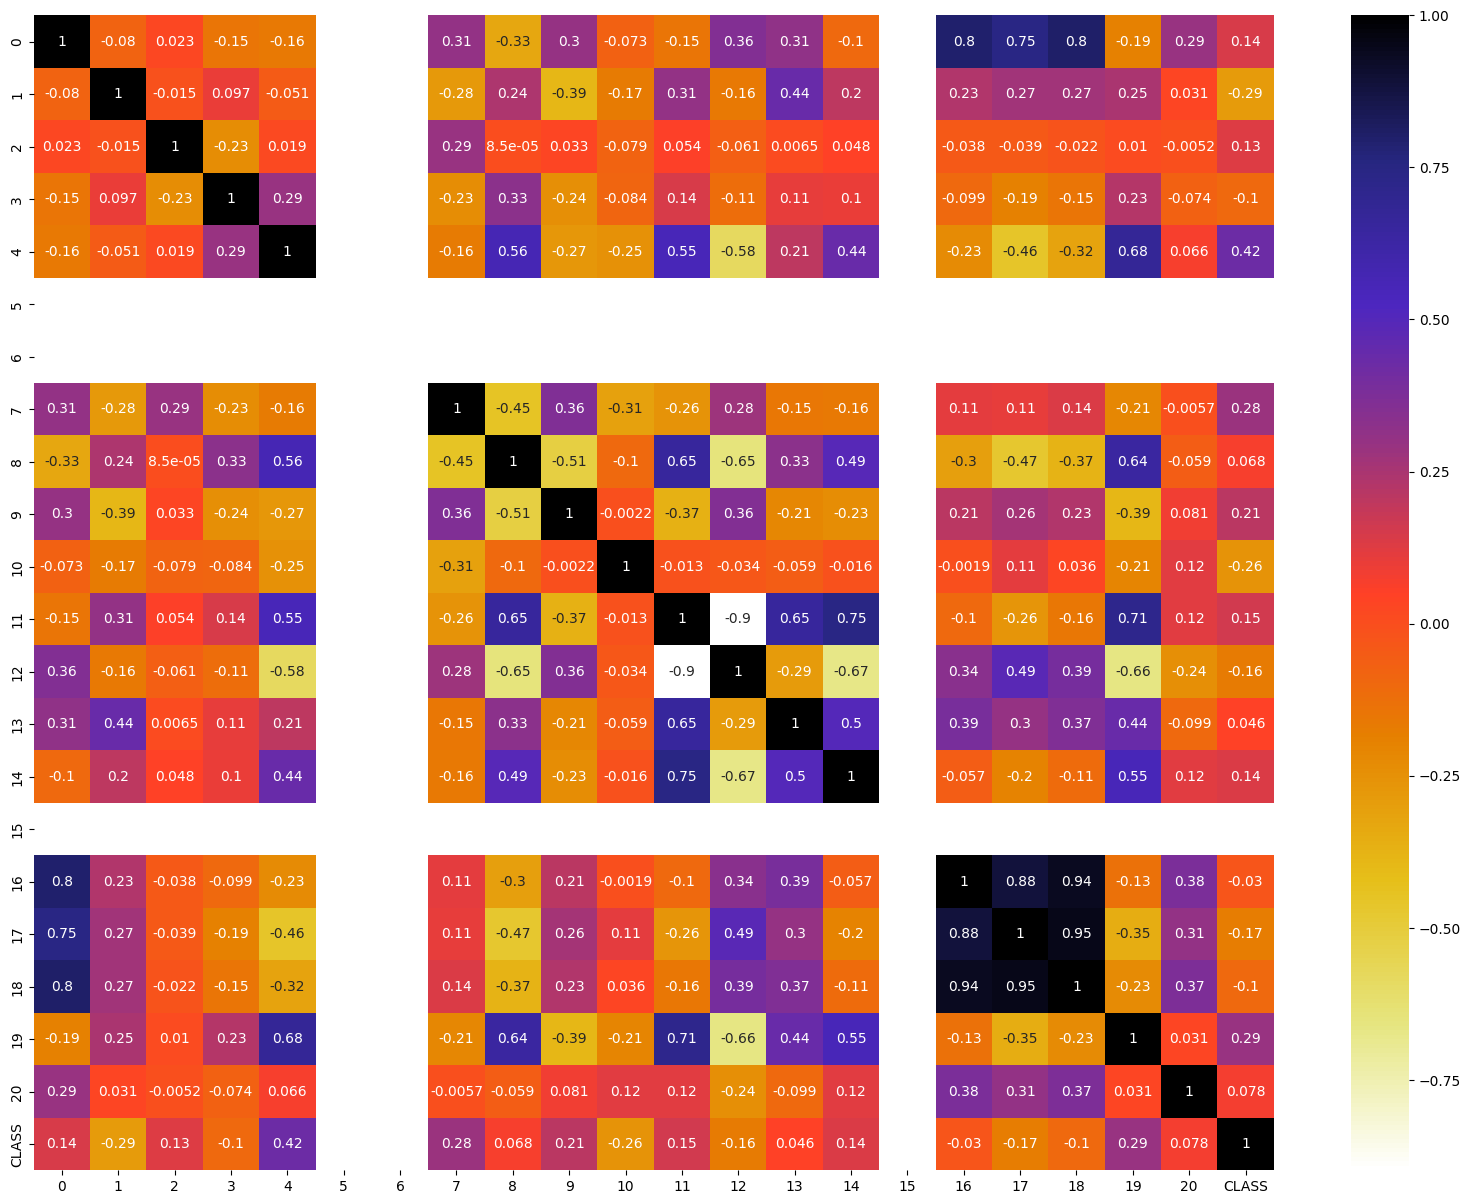

In [18]:
cor = df.corr()              
plt.figure(figsize=(20,15))
sns.heatmap(cor, cmap=plt.cm.CMRmap_r,annot=True)
plt.show()  

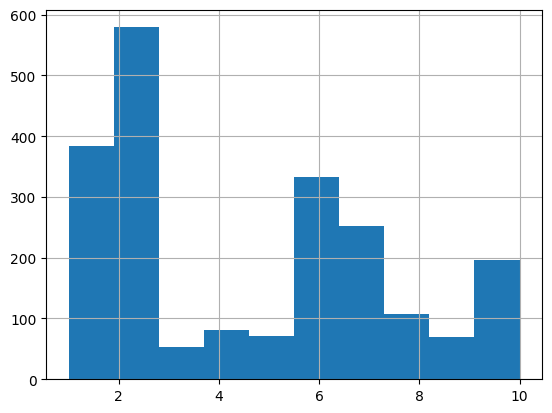

In [19]:
df['CLASS'].hist()      #παρατηρούμε πως έχουμε λίγες παρατηρήσεις στην κλάση 3
plt.show()

In [20]:
df=df.to_numpy()

## Για αριθμητικα in_features και κατηγορηματικα target_feat παμε είτε με f_classif(ANOVA) ή με mutual_info_classif(ενας συντελεστης σχεσης απο 0-1.Μετα απο δοκιμες το mutual δουλευει καλυτερα στο dataset

In [21]:
selector=SelectKBest(mutual_info_classif,k=11) 
selector.fit(X,Y)
selector.transform(X)
X.columns[selector.get_support()]

Int64Index([1, 2, 4, 7, 8, 9, 11, 12, 13, 17, 19], dtype='int64')

Prediction accuracy for the training dataset is:  88.9 %
Prediction accuracy for the testing dataset is:  84.5 %
Prediction balanced accuracy for the training dataset is:  83.5 %
Prediction balanced accuracy for the testing dataset is:  75.9 %
Recall accuracy for the training dataset is:  88.9 %
Recall accuracy for the testing dataset is:  84.5 %
--------------- Confusion Matrix ---------------
[[ 66   3   0   0   1   1   1   0   0   8]
 [  5 110   2   0   0   3   0   0   0   1]
 [  4   0   7   0   0   0   0   0   0   0]
 [  0   9   0   9   0   0   0   0   0   0]
 [  1   1   0   0   5   0   0   0   0   2]
 [  0   2   0   0   0  61   4   1   0   0]
 [  0   0   0   0   0   2  42   0   0   0]
 [  0   0   0   0   0   0   3  22   0   0]
 [  2   0   0   0   0   0   0   0   9   4]
 [  6   0   0   0   0   0   0   0   0  29]]
              precision    recall  f1-score   support

     class 1     0.7857    0.8250    0.8049        80
     class 2     0.8800    0.9091    0.8943       121
     cla

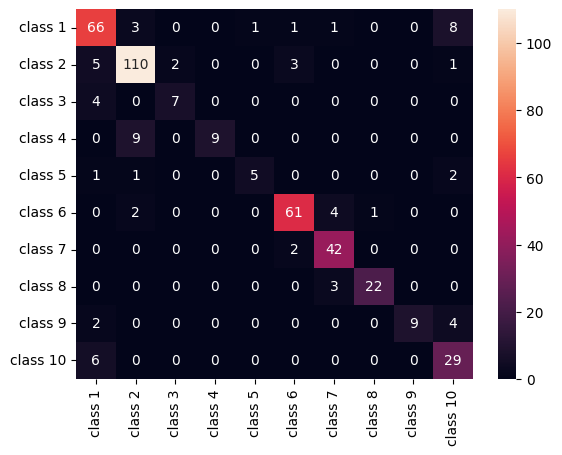

In [45]:
num_feats=df[:,:21]
cat_feats=df[:,21]

start = time.time()

x_train,x_test,y_train,y_test=train_test_split(num_feats,cat_feats,test_size=0.2,shuffle=False)

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train) 
x_test = scaler.transform(x_test) 

clf = svm.SVC()
clf.fit(x_train, y_train)
yp_train=clf.predict(x_train)
yp_test=clf.predict(x_test)

print("Prediction accuracy for the training dataset is: ", np.round(accuracy_score(y_train, yp_train)*100, 1), "%")
print("Prediction accuracy for the testing dataset is: ", np.round(accuracy_score(y_test, yp_test)*100, 1), "%")

print("Prediction balanced accuracy for the training dataset is: ", np.round(balanced_accuracy_score(y_train, yp_train)*100, 1), "%")
print("Prediction balanced accuracy for the testing dataset is: ", np.round(balanced_accuracy_score(y_test, yp_test)*100, 1), "%")

print("Recall accuracy for the training dataset is: ", np.round(recall_score(y_train, yp_train,average='micro')*100, 1), "%")
print("Recall accuracy for the testing dataset is: ", np.round(recall_score(y_test, yp_test,average='micro')*100, 1), "%")

print("--------------- Confusion Matrix ---------------")
print(confusion_matrix(y_test, yp_test))

# Adding classes names for better interpretation
classes_names = ['class 1','class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9','class 10']
cm = pd.DataFrame(confusion_matrix(y_test, yp_test), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, yp_test, target_names=classes_names, digits=4))

end = time.time()
print('execution time:',end - start)

In [23]:
selector=SelectKBest(mutual_info_classif,k=11) 
selector.fit(X,Y)
selector.transform(X)
X.columns[selector.get_support()]

Int64Index([1, 4, 7, 8, 9, 11, 12, 13, 16, 17, 19], dtype='int64')

Prediction accuracy for the training dataset is:  84.2 %
Prediction accuracy for the testing dataset is:  80.3 %
Prediction balanced accuracy for the training dataset is:  72.7 %
Prediction balanced accuracy for the testing dataset is:  67.2 %
Recall accuracy for the training dataset is:  84.2 %
Recall accuracy for the testing dataset is:  80.3 %
--------------- Confusion Matrix ---------------
[[ 57   2   0   0   6   1   2   0   2  10]
 [  7 111   0   1   0   1   1   0   0   0]
 [  8   0   2   0   0   1   0   0   0   0]
 [  0  11   0   7   0   0   0   0   0   0]
 [  2   1   0   0   4   0   0   0   0   2]
 [  0   1   0   0   0  61   4   2   0   0]
 [  0   0   0   0   0   4  40   0   0   0]
 [  0   0   0   0   0   1   2  22   0   0]
 [  6   0   0   0   0   0   0   0   8   1]
 [  4   1   0   0   0   0   0   0   0  30]]
              precision    recall  f1-score   support

     class 1     0.6786    0.7125    0.6951        80
     class 2     0.8740    0.9174    0.8952       121
     cla

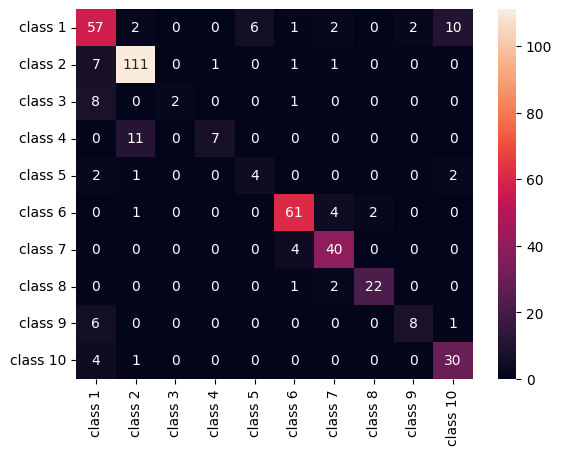

In [24]:
num_feats=df[:,[1, 4, 7, 8, 9, 11, 12, 16, 17, 18, 19]]
cat_feats=df[:,21]

start = time.time()

x_train,x_test,y_train,y_test=train_test_split(num_feats,cat_feats,test_size=0.2,shuffle=False)

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train) 
x_test = scaler.transform(x_test) 

clf = svm.SVC()
clf.fit(x_train, y_train)
yp_train=clf.predict(x_train)
yp_test=clf.predict(x_test)

print("Prediction accuracy for the training dataset is: ", np.round(accuracy_score(y_train, yp_train)*100, 1), "%")
print("Prediction accuracy for the testing dataset is: ", np.round(accuracy_score(y_test, yp_test)*100, 1), "%")

print("Prediction balanced accuracy for the training dataset is: ", np.round(balanced_accuracy_score(y_train, yp_train)*100, 1), "%")
print("Prediction balanced accuracy for the testing dataset is: ", np.round(balanced_accuracy_score(y_test, yp_test)*100, 1), "%")

print("Recall accuracy for the training dataset is: ", np.round(recall_score(y_train, yp_train,average='micro')*100, 1), "%")
print("Recall accuracy for the testing dataset is: ", np.round(recall_score(y_test, yp_test,average='micro')*100, 1), "%")

print("--------------- Confusion Matrix ---------------")
print(confusion_matrix(y_test, yp_test))

# Adding classes names for better interpretation
classes_names = ['class 1','class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9','class 10']
cm = pd.DataFrame(confusion_matrix(y_test, yp_test), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, yp_test, target_names=classes_names, digits=4))

end = time.time()
print('execution time:',end - start)

In [25]:
selector=SelectKBest(mutual_info_classif,k=2) 
selector.fit(X,Y)
selector.transform(X)
X.columns[selector.get_support()]

Int64Index([1, 19], dtype='int64')

Prediction accuracy for the training dataset is:  63.7 %
Prediction accuracy for the testing dataset is:  67.1 %
Prediction balanced accuracy for the training dataset is:  41.5 %
Prediction balanced accuracy for the testing dataset is:  42.0 %
Recall accuracy for the training dataset is:  63.7 %
Recall accuracy for the testing dataset is:  67.1 %
--------------- Confusion Matrix ---------------
[[ 72   6   0   0   0   0   2   0   0   0]
 [  3 107   0   0   0   9   1   1   0   0]
 [  5   2   0   0   0   0   4   0   0   0]
 [  0   9   0   5   0   4   0   0   0   0]
 [  7   1   0   0   0   0   1   0   0   0]
 [  0  11   0   0   0  55   2   0   0   0]
 [  1   0   0   0   0   5  32   6   0   0]
 [  0   0   0   0   0   3   7  15   0   0]
 [ 15   0   0   0   0   0   0   0   0   0]
 [ 34   1   0   0   0   0   0   0   0   0]]
              precision    recall  f1-score   support

     class 1     0.5255    0.9000    0.6636        80
     class 2     0.7810    0.8843    0.8295       121
     cla

C:\Users\masto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\masto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\masto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

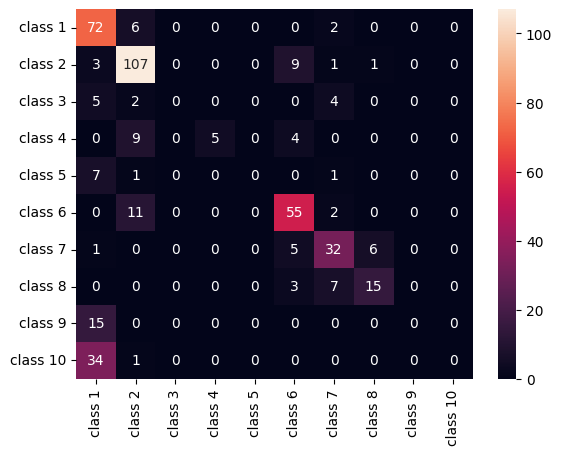

In [26]:
num_feats=df[:,[1, 19]]
cat_feats=df[:,21]

start = time.time()

x_train,x_test,y_train,y_test=train_test_split(num_feats,cat_feats,test_size=0.2,shuffle=False)

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train) 
x_test = scaler.transform(x_test) 

clf = svm.SVC()
clf.fit(x_train, y_train)
yp_train=clf.predict(x_train)
yp_test=clf.predict(x_test)

print("Prediction accuracy for the training dataset is: ", np.round(accuracy_score(y_train, yp_train)*100, 1), "%")
print("Prediction accuracy for the testing dataset is: ", np.round(accuracy_score(y_test, yp_test)*100, 1), "%")

print("Prediction balanced accuracy for the training dataset is: ", np.round(balanced_accuracy_score(y_train, yp_train)*100, 1), "%")
print("Prediction balanced accuracy for the testing dataset is: ", np.round(balanced_accuracy_score(y_test, yp_test)*100, 1), "%")

print("Recall accuracy for the training dataset is: ", np.round(recall_score(y_train, yp_train,average='micro')*100, 1), "%")
print("Recall accuracy for the testing dataset is: ", np.round(recall_score(y_test, yp_test,average='micro')*100, 1), "%")

print("--------------- Confusion Matrix ---------------")
print(confusion_matrix(y_test, yp_test))

# Adding classes names for better interpretation
classes_names = ['class 1','class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9','class 10']
cm = pd.DataFrame(confusion_matrix(y_test, yp_test), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, yp_test, target_names=classes_names, digits=4))

end = time.time()
print('execution time:',end - start)

In [27]:
selector=SelectKBest(mutual_info_classif,k=3) 
selector.fit(X,Y)
selector.transform(X)
X.columns[selector.get_support()]

Int64Index([1, 4, 19], dtype='int64')

Prediction accuracy for the training dataset is:  69.7 %
Prediction accuracy for the testing dataset is:  72.8 %
Prediction balanced accuracy for the training dataset is:  45.8 %
Prediction balanced accuracy for the testing dataset is:  46.8 %
Recall accuracy for the training dataset is:  69.7 %
Recall accuracy for the testing dataset is:  72.8 %
--------------- Confusion Matrix ---------------
[[ 73   4   0   0   0   1   2   0   0   0]
 [  4 114   0   1   0   1   0   1   0   0]
 [  9   1   0   0   0   1   0   0   0   0]
 [  0  10   0   8   0   0   0   0   0   0]
 [  8   1   0   0   0   0   0   0   0   0]
 [  0   2   0   0   0  61   4   1   0   0]
 [  0   0   0   0   0   4  39   1   0   0]
 [  0   1   0   0   0   2   7  15   0   0]
 [ 15   0   0   0   0   0   0   0   0   0]
 [ 34   1   0   0   0   0   0   0   0   0]]
              precision    recall  f1-score   support

     class 1     0.5105    0.9125    0.6547        80
     class 2     0.8507    0.9421    0.8941       121
     cla

C:\Users\masto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\masto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\masto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

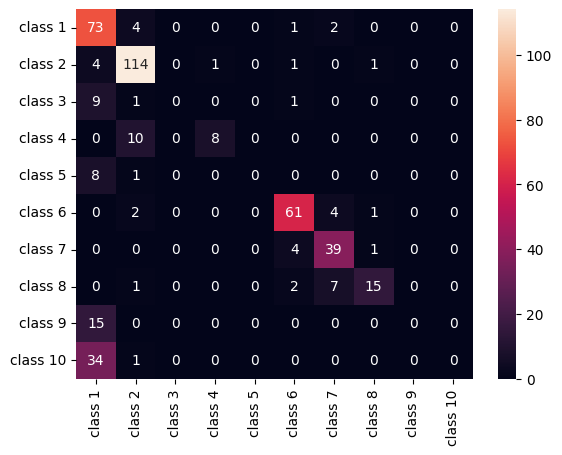

In [28]:
num_feats=df[:,[1, 4, 19]]
cat_feats=df[:,21]

start = time.time()

x_train,x_test,y_train,y_test=train_test_split(num_feats,cat_feats,test_size=0.2,shuffle=False)

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train) 
x_test = scaler.transform(x_test) 

clf = svm.SVC()
clf.fit(x_train, y_train)
yp_train=clf.predict(x_train)
yp_test=clf.predict(x_test)

print("Prediction accuracy for the training dataset is: ", np.round(accuracy_score(y_train, yp_train)*100, 1), "%")
print("Prediction accuracy for the testing dataset is: ", np.round(accuracy_score(y_test, yp_test)*100, 1), "%")

print("Prediction balanced accuracy for the training dataset is: ", np.round(balanced_accuracy_score(y_train, yp_train)*100, 1), "%")
print("Prediction balanced accuracy for the testing dataset is: ", np.round(balanced_accuracy_score(y_test, yp_test)*100, 1), "%")

print("Recall accuracy for the training dataset is: ", np.round(recall_score(y_train, yp_train,average='micro')*100, 1), "%")
print("Recall accuracy for the testing dataset is: ", np.round(recall_score(y_test, yp_test,average='micro')*100, 1), "%")

print("--------------- Confusion Matrix ---------------")
print(confusion_matrix(y_test, yp_test))

# Adding classes names for better interpretation
classes_names = ['class 1','class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9','class 10']
cm = pd.DataFrame(confusion_matrix(y_test, yp_test), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, yp_test, target_names=classes_names, digits=4))

end = time.time()
print('execution time:',end - start)

In [29]:
selector=SelectKBest(mutual_info_classif,k=4) 
selector.fit(X,Y)
selector.transform(X)
X.columns[selector.get_support()]

Int64Index([1, 4, 8, 19], dtype='int64')

Prediction accuracy for the training dataset is:  74.8 %
Prediction accuracy for the testing dataset is:  75.1 %
Prediction balanced accuracy for the training dataset is:  52.2 %
Prediction balanced accuracy for the testing dataset is:  51.9 %
Recall accuracy for the training dataset is:  74.8 %
Recall accuracy for the testing dataset is:  75.1 %
--------------- Confusion Matrix ---------------
[[ 63   6   0   0   0   2   2   0   0   7]
 [  5 112   0   1   0   2   0   1   0   0]
 [  9   1   0   0   0   1   0   0   0   0]
 [  0  10   0   8   0   0   0   0   0   0]
 [  8   1   0   0   0   0   0   0   0   0]
 [  0   4   0   0   0  59   4   1   0   0]
 [  0   0   0   0   0   4  40   0   0   0]
 [  0   1   0   0   0   1   8  15   0   0]
 [  3   0   0   0   0   0   0   0   0  12]
 [ 11   1   0   0   0   0   0   0   0  23]]
              precision    recall  f1-score   support

     class 1     0.6364    0.7875    0.7039        80
     class 2     0.8235    0.9256    0.8716       121
     cla

C:\Users\masto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\masto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\masto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

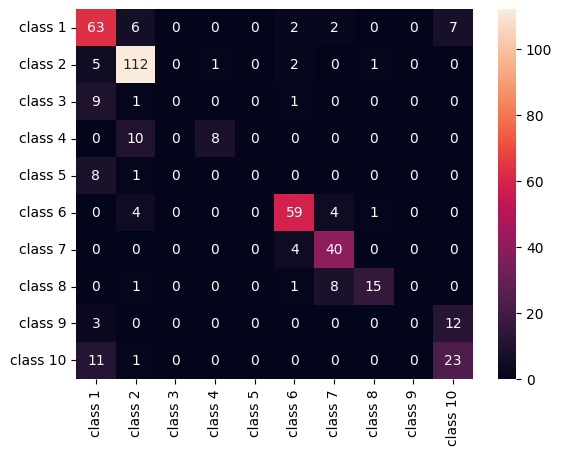

In [30]:
num_feats=df[:,[1, 4, 8, 19]]    #αν και to mutual_info προτεινε την 11 με την 11 παμε στο 70.7% ενω με την 8 παμε στο 77%
cat_feats=df[:,21]                 #γενικα η mutual_info δεν δινει παντα τον ιδιο συνδυασμο οπως ενημερωνει και το scikit-learn

start = time.time()

x_train,x_test,y_train,y_test=train_test_split(num_feats,cat_feats,test_size=0.2,shuffle=False)

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train) 
x_test = scaler.transform(x_test) 

clf = svm.SVC()
clf.fit(x_train, y_train)
yp_train=clf.predict(x_train)
yp_test=clf.predict(x_test)

print("Prediction accuracy for the training dataset is: ", np.round(accuracy_score(y_train, yp_train)*100, 1), "%")
print("Prediction accuracy for the testing dataset is: ", np.round(accuracy_score(y_test, yp_test)*100, 1), "%")

print("Prediction balanced accuracy for the training dataset is: ", np.round(balanced_accuracy_score(y_train, yp_train)*100, 1), "%")
print("Prediction balanced accuracy for the testing dataset is: ", np.round(balanced_accuracy_score(y_test, yp_test)*100, 1), "%")

print("Recall accuracy for the training dataset is: ", np.round(recall_score(y_train, yp_train,average='micro')*100, 1), "%")
print("Recall accuracy for the testing dataset is: ", np.round(recall_score(y_test, yp_test,average='micro')*100, 1), "%")

print("--------------- Confusion Matrix ---------------")
print(confusion_matrix(y_test, yp_test))

# Adding classes names for better interpretation
classes_names = ['class 1','class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9','class 10']
cm = pd.DataFrame(confusion_matrix(y_test, yp_test), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, yp_test, target_names=classes_names, digits=4))

end = time.time()
print('execution time:',end - start)

In [31]:
selector=SelectKBest(mutual_info_classif,k=5) 
selector.fit(X,Y)
selector.transform(X)
X.columns[selector.get_support()]

Int64Index([1, 4, 8, 11, 19], dtype='int64')

Prediction accuracy for the training dataset is:  76.2 %
Prediction accuracy for the testing dataset is:  75.6 %
Prediction balanced accuracy for the training dataset is:  54.5 %
Prediction balanced accuracy for the testing dataset is:  52.7 %
Recall accuracy for the training dataset is:  76.2 %
Recall accuracy for the testing dataset is:  75.6 %
--------------- Confusion Matrix ---------------
[[ 60   6   0   0   0   2   2   0   0  10]
 [  6 112   0   0   0   2   1   0   0   0]
 [  9   1   0   0   0   1   0   0   0   0]
 [  0  10   0   8   0   0   0   0   0   0]
 [  8   1   0   0   0   0   0   0   0   0]
 [  0   3   0   0   0  61   3   1   0   0]
 [  0   0   0   0   0   4  40   0   0   0]
 [  0   1   0   0   0   1   8  15   0   0]
 [  1   0   0   0   0   0   0   0   0  14]
 [  8   1   0   0   0   0   0   0   0  26]]
              precision    recall  f1-score   support

     class 1     0.6522    0.7500    0.6977        80
     class 2     0.8296    0.9256    0.8750       121
     cla

C:\Users\masto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\masto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\masto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

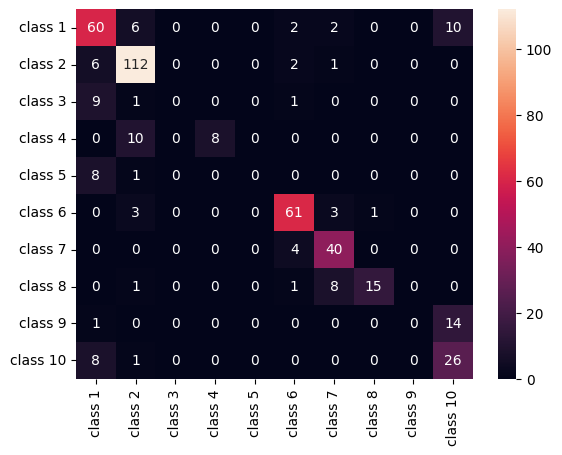

In [32]:
num_feats=df[:,[1, 4, 8, 11, 19]]
cat_feats=df[:,21]

start = time.time()

x_train,x_test,y_train,y_test=train_test_split(num_feats,cat_feats,test_size=0.2,shuffle=False)

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train) 
x_test = scaler.transform(x_test) 

clf = svm.SVC()
clf.fit(x_train, y_train)
yp_train=clf.predict(x_train)
yp_test=clf.predict(x_test)

print("Prediction accuracy for the training dataset is: ", np.round(accuracy_score(y_train, yp_train)*100, 1), "%")
print("Prediction accuracy for the testing dataset is: ", np.round(accuracy_score(y_test, yp_test)*100, 1), "%")

print("Prediction balanced accuracy for the training dataset is: ", np.round(balanced_accuracy_score(y_train, yp_train)*100, 1), "%")
print("Prediction balanced accuracy for the testing dataset is: ", np.round(balanced_accuracy_score(y_test, yp_test)*100, 1), "%")

print("Recall accuracy for the training dataset is: ", np.round(recall_score(y_train, yp_train,average='micro')*100, 1), "%")
print("Recall accuracy for the testing dataset is: ", np.round(recall_score(y_test, yp_test,average='micro')*100, 1), "%")

print("--------------- Confusion Matrix ---------------")
print(confusion_matrix(y_test, yp_test))

# Adding classes names for better interpretation
classes_names = ['class 1','class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9','class 10']
cm = pd.DataFrame(confusion_matrix(y_test, yp_test), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, yp_test, target_names=classes_names, digits=4))

end = time.time()
print('execution time:',end - start)

In [33]:
selector=SelectKBest(mutual_info_classif,k=6) 
selector.fit(X,Y)
selector.transform(X)
X.columns[selector.get_support()]

Int64Index([1, 4, 8, 11, 12, 19], dtype='int64')

Prediction accuracy for the training dataset is:  78.8 %
Prediction accuracy for the testing dataset is:  79.1 %
Prediction balanced accuracy for the training dataset is:  61.7 %
Prediction balanced accuracy for the testing dataset is:  59.6 %
Recall accuracy for the training dataset is:  78.8 %
Recall accuracy for the testing dataset is:  79.1 %
--------------- Confusion Matrix ---------------
[[ 63   7   0   0   0   1   2   0   1   6]
 [  6 112   0   0   0   1   1   0   0   1]
 [  8   1   1   0   0   1   0   0   0   0]
 [  0  11   0   7   0   0   0   0   0   0]
 [  7   1   1   0   0   0   0   0   0   0]
 [  0   2   0   0   0  60   4   2   0   0]
 [  0   0   0   0   0   4  40   0   0   0]
 [  0   1   0   0   0   2   4  18   0   0]
 [  0   0   0   0   0   0   0   0   6   9]
 [  2   1   0   0   0   0   0   0   2  30]]
              precision    recall  f1-score   support

     class 1     0.7326    0.7875    0.7590        80
     class 2     0.8235    0.9256    0.8716       121
     cla

C:\Users\masto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\masto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\masto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

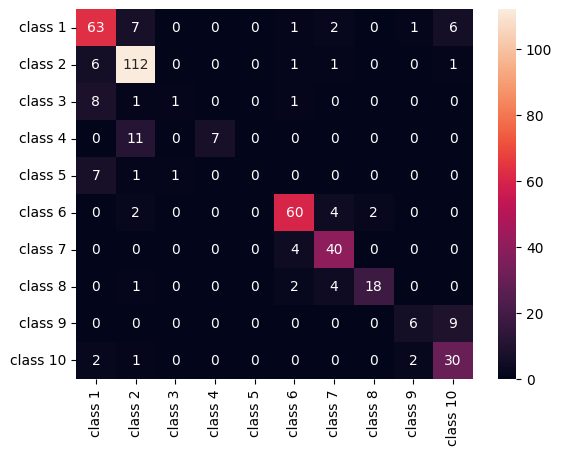

In [34]:
num_feats=df[:,[1, 4, 8, 11,7, 19]]   #το mut_info προτεινει την 12 αλλα το συγκεκριμενο feature ριχνει την αποδοση
cat_feats=df[:,21]                     #θα κινηθουμε με επιλογη απο το heatmap

start = time.time()

x_train,x_test,y_train,y_test=train_test_split(num_feats,cat_feats,test_size=0.2,shuffle=False)

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train) 
x_test = scaler.transform(x_test) 

clf = svm.SVC()
clf.fit(x_train, y_train)
yp_train=clf.predict(x_train)
yp_test=clf.predict(x_test)

print("Prediction accuracy for the training dataset is: ", np.round(accuracy_score(y_train, yp_train)*100, 1), "%")
print("Prediction accuracy for the testing dataset is: ", np.round(accuracy_score(y_test, yp_test)*100, 1), "%")

print("Prediction balanced accuracy for the training dataset is: ", np.round(balanced_accuracy_score(y_train, yp_train)*100, 1), "%")
print("Prediction balanced accuracy for the testing dataset is: ", np.round(balanced_accuracy_score(y_test, yp_test)*100, 1), "%")

print("Recall accuracy for the training dataset is: ", np.round(recall_score(y_train, yp_train,average='micro')*100, 1), "%")
print("Recall accuracy for the testing dataset is: ", np.round(recall_score(y_test, yp_test,average='micro')*100, 1), "%")

print("--------------- Confusion Matrix ---------------")
print(confusion_matrix(y_test, yp_test))

# Adding classes names for better interpretation
classes_names = ['class 1','class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9','class 10']
cm = pd.DataFrame(confusion_matrix(y_test, yp_test), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, yp_test, target_names=classes_names, digits=4))

end = time.time()
print('execution time:',end - start)

In [35]:
selector=SelectKBest(mutual_info_classif,k=8) #το mutual_info επιμενει για την 12 ωστοσο παλι δεν κερδιζουμε ακριβεια
selector.fit(X,Y)                   #οπότε θα αυξήσουμε το k κατα μια μοναδα και θα παρουμε την αμεσως επομενη καλυτερη επιλογη
selector.transform(X)
X.columns[selector.get_support()]

Int64Index([1, 4, 7, 8, 9, 11, 12, 19], dtype='int64')

Prediction accuracy for the training dataset is:  81.7 %
Prediction accuracy for the testing dataset is:  81.5 %
Prediction balanced accuracy for the training dataset is:  67.6 %
Prediction balanced accuracy for the testing dataset is:  64.6 %
Recall accuracy for the training dataset is:  81.7 %
Recall accuracy for the testing dataset is:  81.5 %
--------------- Confusion Matrix ---------------
[[ 60   2   0   0   4   1   2   0   0  11]
 [  5 111   0   1   0   1   0   1   0   2]
 [  8   1   1   0   0   1   0   0   0   0]
 [  0   8   0  10   0   0   0   0   0   0]
 [  5   2   0   0   1   0   0   0   0   1]
 [  0   1   0   0   0  62   3   2   0   0]
 [  0   0   0   0   0   3  41   0   0   0]
 [  0   0   0   0   0   1   1  23   0   0]
 [  0   0   0   0   0   0   0   0   5  10]
 [  1   1   0   0   0   0   0   0   0  33]]
              precision    recall  f1-score   support

     class 1     0.7595    0.7500    0.7547        80
     class 2     0.8810    0.9174    0.8988       121
     cla

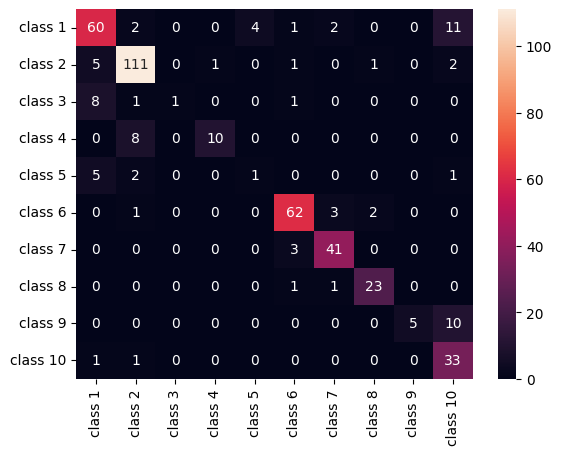

In [36]:
num_feats=df[:,[1, 4, 7, 8, 11,17, 19]]  #γενικα παρατηρουμε πως πλεον με οποιαδηποτε προσθηκη ενος feature η ακριβεια που παιρνουμε ειναι πολυ μικρη(κοντα στο 0.5%)
cat_feats=df[:,21]     #αυτο λογικα οφειλεται στο οτι ta features ειναι συσχετισμενα μεταξυ τους οποτε εχοντας εναν πλεον μεγαλο το πληθος συνδυασμο μεταβλητων η επομενη δε μας δινει ιδιαιτερα μεγαλη επιπλεον πληροφορια

start = time.time()

x_train,x_test,y_train,y_test=train_test_split(num_feats,cat_feats,test_size=0.2,shuffle=False)

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train) 
x_test = scaler.transform(x_test) 

clf = svm.SVC()
clf.fit(x_train, y_train)
yp_train=clf.predict(x_train)
yp_test=clf.predict(x_test)

print("Prediction accuracy for the training dataset is: ", np.round(accuracy_score(y_train, yp_train)*100, 1), "%")
print("Prediction accuracy for the testing dataset is: ", np.round(accuracy_score(y_test, yp_test)*100, 1), "%")

print("Prediction balanced accuracy for the training dataset is: ", np.round(balanced_accuracy_score(y_train, yp_train)*100, 1), "%")
print("Prediction balanced accuracy for the testing dataset is: ", np.round(balanced_accuracy_score(y_test, yp_test)*100, 1), "%")

print("Recall accuracy for the training dataset is: ", np.round(recall_score(y_train, yp_train,average='micro')*100, 1), "%")
print("Recall accuracy for the testing dataset is: ", np.round(recall_score(y_test, yp_test,average='micro')*100, 1), "%")

print("--------------- Confusion Matrix ---------------")
print(confusion_matrix(y_test, yp_test))

# Adding classes names for better interpretation
classes_names = ['class 1','class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9','class 10']
cm = pd.DataFrame(confusion_matrix(y_test, yp_test), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, yp_test, target_names=classes_names, digits=4))

end = time.time()
print('execution time:',end - start)

In [37]:
selector=SelectKBest(mutual_info_classif,k=9) 
selector.fit(X,Y)
selector.transform(X)
X.columns[selector.get_support()]

Int64Index([1, 4, 7, 8, 9, 11, 12, 17, 19], dtype='int64')

Prediction accuracy for the training dataset is:  83.7 %
Prediction accuracy for the testing dataset is:  81.0 %
Prediction balanced accuracy for the training dataset is:  74.9 %
Prediction balanced accuracy for the testing dataset is:  69.1 %
Recall accuracy for the training dataset is:  83.7 %
Recall accuracy for the testing dataset is:  81.0 %
--------------- Confusion Matrix ---------------
[[ 57   2   1   0   4   1   2   0   1  12]
 [  6 110   2   0   0   1   0   1   0   1]
 [  4   0   7   0   0   0   0   0   0   0]
 [  0   6   0  12   0   0   0   0   0   0]
 [  4   2   0   0   2   0   0   0   0   1]
 [  0   2   0   0   0  60   3   3   0   0]
 [  0   0   0   0   0   2  42   0   0   0]
 [  0   0   0   0   0   1   3  21   0   0]
 [  1   0   0   0   0   0   0   0   3  11]
 [  2   1   0   0   0   0   0   0   1  31]]
              precision    recall  f1-score   support

     class 1     0.7703    0.7125    0.7403        80
     class 2     0.8943    0.9091    0.9016       121
     cla

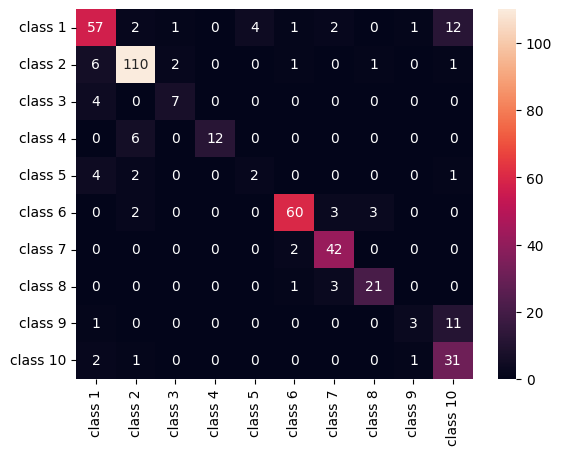

In [38]:
num_feats=df[:,[1, 4, 7, 8, 10, 11,  17, 19]]   # θα βαλουμε την 10 αντι της 9
cat_feats=df[:,21]

start = time.time()

x_train,x_test,y_train,y_test=train_test_split(num_feats,cat_feats,test_size=0.2,shuffle=False)

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train) 
x_test = scaler.transform(x_test) 

clf = svm.SVC()
clf.fit(x_train, y_train)
yp_train=clf.predict(x_train)
yp_test=clf.predict(x_test)

print("Prediction accuracy for the training dataset is: ", np.round(accuracy_score(y_train, yp_train)*100, 1), "%")
print("Prediction accuracy for the testing dataset is: ", np.round(accuracy_score(y_test, yp_test)*100, 1), "%")

print("Prediction balanced accuracy for the training dataset is: ", np.round(balanced_accuracy_score(y_train, yp_train)*100, 1), "%")
print("Prediction balanced accuracy for the testing dataset is: ", np.round(balanced_accuracy_score(y_test, yp_test)*100, 1), "%")

print("Recall accuracy for the training dataset is: ", np.round(recall_score(y_train, yp_train,average='micro')*100, 1), "%")
print("Recall accuracy for the testing dataset is: ", np.round(recall_score(y_test, yp_test,average='micro')*100, 1), "%")

print("--------------- Confusion Matrix ---------------")
print(confusion_matrix(y_test, yp_test))

# Adding classes names for better interpretation
classes_names = ['class 1','class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9','class 10']
cm = pd.DataFrame(confusion_matrix(y_test, yp_test), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, yp_test, target_names=classes_names, digits=4))

end = time.time()
print('execution time:',end - start)

In [39]:
selector=SelectKBest(mutual_info_classif,k=10) 
selector.fit(X,Y)
selector.transform(X)
X.columns[selector.get_support()]

Int64Index([1, 4, 7, 8, 9, 11, 12, 16, 17, 19], dtype='int64')

Prediction accuracy for the training dataset is:  83.7 %
Prediction accuracy for the testing dataset is:  81.0 %
Prediction balanced accuracy for the training dataset is:  74.9 %
Prediction balanced accuracy for the testing dataset is:  69.1 %
Recall accuracy for the training dataset is:  83.7 %
Recall accuracy for the testing dataset is:  81.0 %
--------------- Confusion Matrix ---------------
[[ 57   2   1   0   4   1   2   0   1  12]
 [  6 110   2   0   0   1   0   1   0   1]
 [  4   0   7   0   0   0   0   0   0   0]
 [  0   6   0  12   0   0   0   0   0   0]
 [  4   2   0   0   2   0   0   0   0   1]
 [  0   2   0   0   0  60   3   3   0   0]
 [  0   0   0   0   0   2  42   0   0   0]
 [  0   0   0   0   0   1   3  21   0   0]
 [  1   0   0   0   0   0   0   0   3  11]
 [  2   1   0   0   0   0   0   0   1  31]]
              precision    recall  f1-score   support

     class 1     0.7703    0.7125    0.7403        80
     class 2     0.8943    0.9091    0.9016       121
     cla

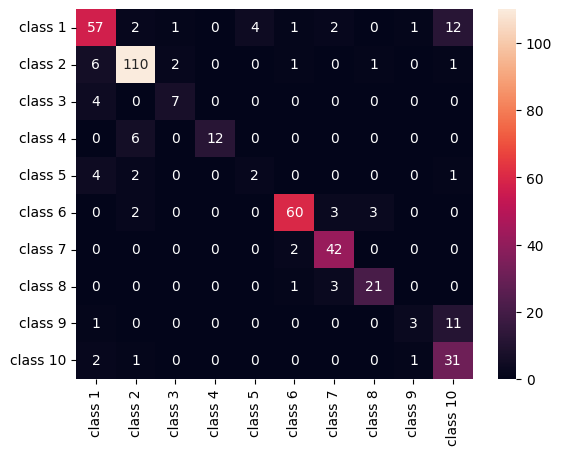

In [40]:
num_feats=df[:,[1, 4, 7, 8, 10, 11,6, 17, 19]]   #η 18 και η 16 ριχνει την αποδοση του αλγοριθμου
cat_feats=df[:,21]

start = time.time()

x_train,x_test,y_train,y_test=train_test_split(num_feats,cat_feats,test_size=0.2,shuffle=False)

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train) 
x_test = scaler.transform(x_test) 

clf = svm.SVC()
clf.fit(x_train, y_train)
yp_train=clf.predict(x_train)
yp_test=clf.predict(x_test)

print("Prediction accuracy for the training dataset is: ", np.round(accuracy_score(y_train, yp_train)*100, 1), "%")
print("Prediction accuracy for the testing dataset is: ", np.round(accuracy_score(y_test, yp_test)*100, 1), "%")

print("Prediction balanced accuracy for the training dataset is: ", np.round(balanced_accuracy_score(y_train, yp_train)*100, 1), "%")
print("Prediction balanced accuracy for the testing dataset is: ", np.round(balanced_accuracy_score(y_test, yp_test)*100, 1), "%")

print("Recall accuracy for the training dataset is: ", np.round(recall_score(y_train, yp_train,average='micro')*100, 1), "%")
print("Recall accuracy for the testing dataset is: ", np.round(recall_score(y_test, yp_test,average='micro')*100, 1), "%")

print("--------------- Confusion Matrix ---------------")
print(confusion_matrix(y_test, yp_test))

# Adding classes names for better interpretation
classes_names = ['class 1','class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9','class 10']
cm = pd.DataFrame(confusion_matrix(y_test, yp_test), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, yp_test, target_names=classes_names, digits=4))

end = time.time()
print('execution time:',end - start)

In [41]:
selector=SelectKBest(mutual_info_classif,k=11) 
selector.fit(X,Y)
selector.transform(X)
X.columns[selector.get_support()]

Int64Index([1, 2, 4, 7, 8, 9, 11, 12, 16, 17, 19], dtype='int64')

Prediction accuracy for the training dataset is:  84.1 %
Prediction accuracy for the testing dataset is:  81.7 %
Prediction balanced accuracy for the training dataset is:  75.5 %
Prediction balanced accuracy for the testing dataset is:  72.3 %
Recall accuracy for the training dataset is:  84.1 %
Recall accuracy for the testing dataset is:  81.7 %
--------------- Confusion Matrix ---------------
[[ 57   2   1   0   5   1   2   0   1  11]
 [  3 110   3   1   0   1   0   1   0   2]
 [  3   0   8   0   0   0   0   0   0   0]
 [  0   7   0  11   0   0   0   0   0   0]
 [  3   1   0   0   4   0   0   0   0   1]
 [  0   2   0   0   0  60   3   3   0   0]
 [  1   0   0   0   0   1  42   0   0   0]
 [  0   0   0   0   0   1   3  21   0   0]
 [  0   0   0   0   0   0   0   0   4  11]
 [  2   1   0   0   0   0   0   0   1  31]]
              precision    recall  f1-score   support

     class 1     0.8261    0.7125    0.7651        80
     class 2     0.8943    0.9091    0.9016       121
     cla

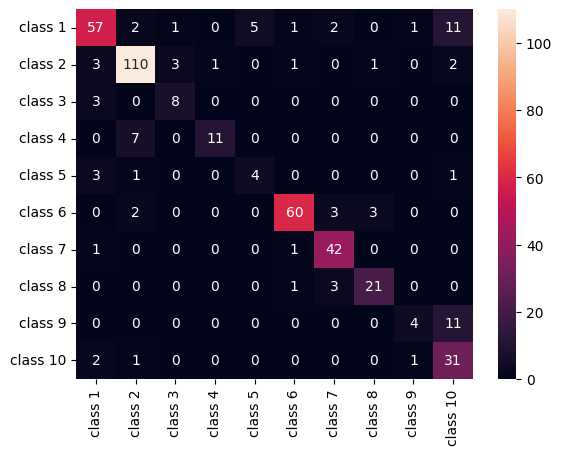

In [42]:
num_feats=df[:,[1, 4, 6,7, 8,10, 11,14, 17, 19]]  #πρωτη φορα μεχρι στιγμης έχουμε θετικο f1-score για την κλαση 5
cat_feats=df[:,21]     #αυτο οφειλεται στην προσθηκη της 14 καθως φαινεται εχει την (υπολοιπη) απαραιτητη πληροφορια για την προβλεψη παρατηρησεων που προερχονται απο την κλαση 5

start = time.time()

x_train,x_test,y_train,y_test=train_test_split(num_feats,cat_feats,test_size=0.2,shuffle=False)

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train) 
x_test = scaler.transform(x_test) 

clf = svm.SVC()
clf.fit(x_train, y_train)
yp_train=clf.predict(x_train)
yp_test=clf.predict(x_test)

print("Prediction accuracy for the training dataset is: ", np.round(accuracy_score(y_train, yp_train)*100, 1), "%")
print("Prediction accuracy for the testing dataset is: ", np.round(accuracy_score(y_test, yp_test)*100, 1), "%")

print("Prediction balanced accuracy for the training dataset is: ", np.round(balanced_accuracy_score(y_train, yp_train)*100, 1), "%")
print("Prediction balanced accuracy for the testing dataset is: ", np.round(balanced_accuracy_score(y_test, yp_test)*100, 1), "%")

print("Recall accuracy for the training dataset is: ", np.round(recall_score(y_train, yp_train,average='micro')*100, 1), "%")
print("Recall accuracy for the testing dataset is: ", np.round(recall_score(y_test, yp_test,average='micro')*100, 1), "%")

print("--------------- Confusion Matrix ---------------")
print(confusion_matrix(y_test, yp_test))

# Adding classes names for better interpretation
classes_names = ['class 1','class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9','class 10']
cm = pd.DataFrame(confusion_matrix(y_test, yp_test), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, yp_test, target_names=classes_names, digits=4))

end = time.time()
print('execution time:',end - start)

Prediction accuracy for the training dataset is:  88.9 %
Prediction accuracy for the testing dataset is:  84.5 %
Prediction balanced accuracy for the training dataset is:  83.5 %
Prediction balanced accuracy for the testing dataset is:  75.9 %
Recall accuracy for the training dataset is:  88.9 %
Recall accuracy for the testing dataset is:  84.5 %
--------------- Confusion Matrix ---------------
[[ 66   3   0   0   1   1   1   0   0   8]
 [  5 110   2   0   0   3   0   0   0   1]
 [  4   0   7   0   0   0   0   0   0   0]
 [  0   9   0   9   0   0   0   0   0   0]
 [  1   1   0   0   5   0   0   0   0   2]
 [  0   2   0   0   0  61   4   1   0   0]
 [  0   0   0   0   0   2  42   0   0   0]
 [  0   0   0   0   0   0   3  22   0   0]
 [  2   0   0   0   0   0   0   0   9   4]
 [  6   0   0   0   0   0   0   0   0  29]]
              precision    recall  f1-score   support

     class 1     0.7857    0.8250    0.8049        80
     class 2     0.8800    0.9091    0.8943       121
     cla

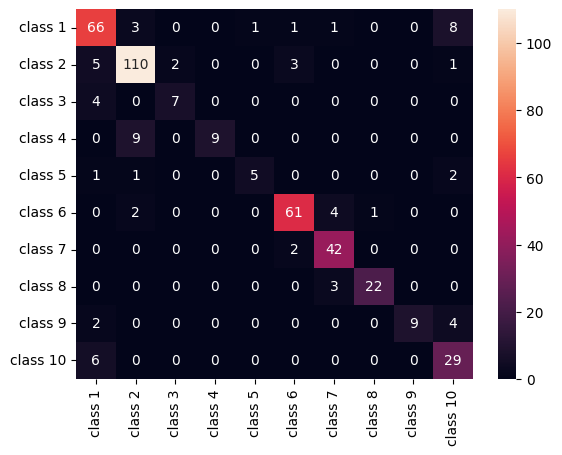

In [49]:
num_feats=df[:,[0,1,2,3,4,7,8,9,10,11,12,13,14,16,17,18,19,20]]  
cat_feats=df[:,21]    

start = time.time()

x_train,x_test,y_train,y_test=train_test_split(num_feats,cat_feats,test_size=0.2,shuffle=False)

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train) 
x_test = scaler.transform(x_test) 

clf = svm.SVC()
clf.fit(x_train, y_train)
yp_train=clf.predict(x_train)
yp_test=clf.predict(x_test)

print("Prediction accuracy for the training dataset is: ", np.round(accuracy_score(y_train, yp_train)*100, 1), "%")
print("Prediction accuracy for the testing dataset is: ", np.round(accuracy_score(y_test, yp_test)*100, 1), "%")

print("Prediction balanced accuracy for the training dataset is: ", np.round(balanced_accuracy_score(y_train, yp_train)*100, 1), "%")
print("Prediction balanced accuracy for the testing dataset is: ", np.round(balanced_accuracy_score(y_test, yp_test)*100, 1), "%")

print("Recall accuracy for the training dataset is: ", np.round(recall_score(y_train, yp_train,average='micro')*100, 1), "%")
print("Recall accuracy for the testing dataset is: ", np.round(recall_score(y_test, yp_test,average='micro')*100, 1), "%")

print("--------------- Confusion Matrix ---------------")
print(confusion_matrix(y_test, yp_test))

# Adding classes names for better interpretation
classes_names = ['class 1','class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9','class 10']
cm = pd.DataFrame(confusion_matrix(y_test, yp_test), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, yp_test, target_names=classes_names, digits=4))

end = time.time()
print('execution time:',end - start)